In [2]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 73.6MB/s]


In [3]:
import pandas as pd

df = pd.read_csv('sales_prediction.csv')

In [4]:
df.shape

(8523, 12)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Prepare Training and Test Datasets**
70-30, seed-42 for reproducibility.

always split data right at the start, if not having seperate datasets.

In [6]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED = 42


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5966, 11)
(2557, 11)
(5966,)
(2557,)


In [8]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
y_train.head(3)

,Item_Outlet_Sales
1921,117.8466
655,1230.3984
2229,4933.5780


# Data Wrangling + EDA + Feature Engineering


In [10]:
X_train_c = X_train.copy()

**Basic EDA**


In [11]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [12]:
# null values in item weight, outlet size
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [13]:
num_data = X_train.select_dtypes(exclude = ['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [14]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [15]:
num_data.isnull().sum()

,0
Item_Weight,1023
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

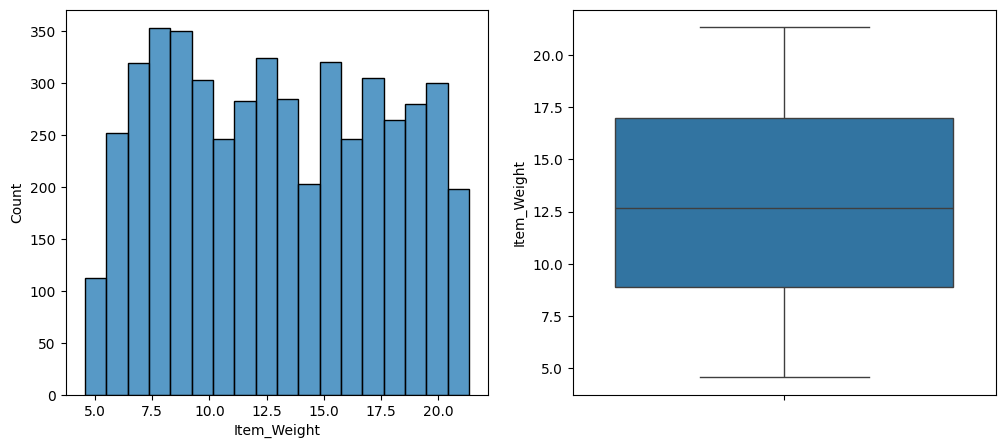

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(X_train_c, x = 'Item_Weight', ax = ax[0]);
sns.boxplot(X_train_c, y = 'Item_Weight', ax = ax[1]);

In [18]:
def visualize_numeric_feature(data_frame, col):
  fig, ax = plt.subplots(1, 2, figsize=(12,5))

  sns.histplot(data = data_frame, x = col, ax = ax[0]);
  sns.boxplot(data = data_frame, y = col, ax = ax[1]);

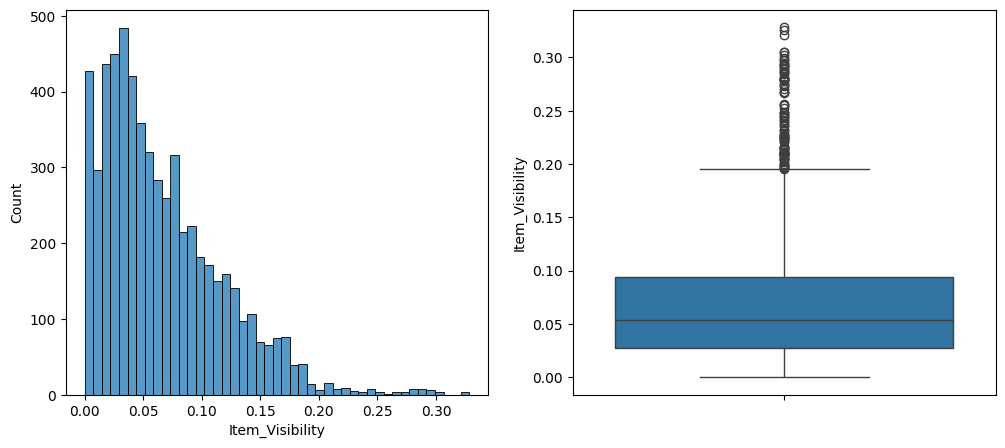

In [19]:
visualize_numeric_feature(X_train_c, 'Item_Visibility')

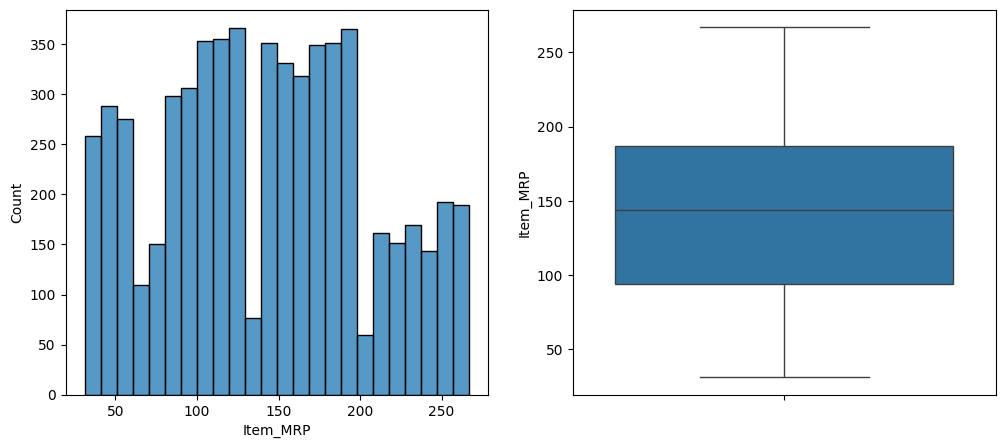

In [20]:
visualize_numeric_feature(X_train_c, 'Item_MRP')

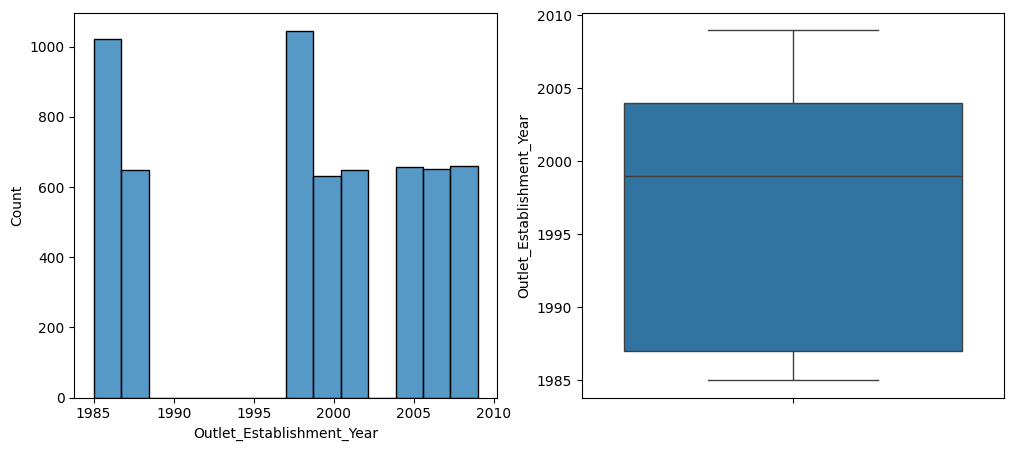

In [21]:
visualize_numeric_feature(X_train_c, 'Outlet_Establishment_Year')

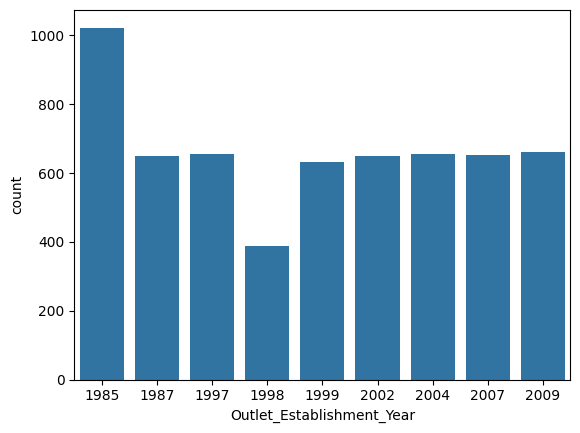

In [22]:
#inaccurate inference in above plot
sns.countplot(data = X_train_c, x = 'Outlet_Establishment_Year');

In [23]:
cat_features = X_train_c.select_dtypes(include = ['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [24]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [25]:
cat_features.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,1690
Outlet_Location_Type,0
Outlet_Type,0


In [26]:
cat_features['Item_Identifier'].value_counts()

,count
Item_Identifier,
NCI54,9
FDF52,9
FDV60,8
FDT07,8
NCB18,8
...,...
FDT47,1
NCW42,1
DRH59,1


In [27]:
cat_features['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [28]:
cat_features['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,905
Snack Foods,835
Household,648
Frozen Foods,591
Dairy,474
Canned,450
Baking Goods,438
Health and Hygiene,365
Soft Drinks,305


In [29]:
cat_features['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,668
OUT018,661
OUT046,656
OUT035,656
OUT017,652
OUT045,649
OUT013,649
OUT049,631
OUT010,389


In [30]:
cat_features['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,1960
Small,1667
High,649


In [31]:
cat_features['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,2367
Tier 2,1957
Tier 1,1642


In [32]:
cat_features['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,3893
Grocery Store,744
Supermarket Type3,668
Supermarket Type2,661


# Data Wrangling and Feature Engineering


step 1 : create high level item types.

In [33]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()
# or X_train_c['Item_Identifier'].str[:2].value_counts() for better performance

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [34]:
# step 1: Map Item IDs to Item Types
def create_item_type(data_frame):
  data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type'] = data_frame['Item_Type'].map({'FD':'Food','NC':'Non-consmables','DR':'Drink'})

  return data_frame

In [35]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-consmables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [36]:
#item weight has some null values
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [37]:
# some weights are not given, maybe there might be a case where two items have same weights, but one has null value
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by = ['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [38]:
X_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by = ['Item_Type']) # Removed extra space after 'Item_Type'

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non-consmables,12.600
6191,Non-consmables,8.880
1911,Non-consmables,19.850
135,Non-consmables,7.235


step - 2:
for handling missing values in items' weights:
approaches used are:
1. fill the one with other having same weights (mapping- item_identifier:weight)
2. median of weights divided by item type


In [39]:
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values = 'Item_Weight', index ='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_PIVOT.head()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115


In [40]:
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [41]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values ='Item_Weight', index = 'Item_Type', aggfunc = 'median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()


dict_items([('Drink', 11.8), ('Food', 12.8), ('Non-consmables', 13.05)])

In [42]:
def impute_item_weight(data_frame):
   # item id-weight
   data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
   # item type-weight
   data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
   return data_frame

In [43]:
X_train_c = impute_item_weight(X_train_c)

In [44]:
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


step 3: Fill in missing values for outlet_size

In [45]:
# domain knowledge
X_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [46]:
import numpy as np
from scipy.stats import mode

def calculate_mode(x):
    return x.mode()[0] if not x.mode().empty else np.nan

X_train_c.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',
                                               aggfunc = calculate_mode).reset_index()

,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [47]:
# 1. use mapping of outlet_type - mode(Outlet_Size) and fill in missing values
# import numpy as np
# from scipy.stats import mode

# def calculate_mode(x):
#     return x.mode()[0] if not x.mode().empty else np.nan


OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',
                                               aggfunc = calculate_mode).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'],OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [48]:
def impute_outlet_size(data_frame):
  # OutletType - mode(Outlet_Size)
  data_frame.loc[:,'Outlet_Size'] = data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
  return data_frame

In [49]:
X_train_c = impute_outlet_size(X_train_c)

In [50]:
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


step 4: Standardize item fat content categories


In [51]:
X_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [52]:
def std_fat_content(data_frame):
  data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({'Low Fat':'Low_Fat','LF':'Low_Fat','reg':'Regular','low fat': 'Low_Fat'})
  return data_frame

In [53]:
X_train_c = std_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low_Fat,3860
Regular,2106


step 5: Correct Item fat content for non-consumables

In [54]:
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-consmables  Low_Fat             1137
dtype: int64

In [55]:
X_train_c.loc[X_train_c['Item_Type'] == 'Non-consmables','Item_Fat_Content']

,Item_Fat_Content
655,Low_Fat
4423,Low_Fat
907,Low_Fat
7021,Low_Fat
6074,Low_Fat
...,...
8322,Low_Fat
466,Low_Fat
6265,Low_Fat
5390,Low_Fat


In [56]:
def correct_non_consumable(data_frame):
  data_frame.loc[data_frame['Item_Type'] == 'Non-consmables','Item_Fat_Content'] = 'Non_Edible'
  return data_frame

In [57]:
X_train_c = correct_non_consumable(X_train_c)
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-consmables  Non_Edible          1137
dtype: int64

In [58]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


#  Prepare Datasets for model

In [59]:
def prepare_dataset(data_frame):
  data_frame = create_item_type(data_frame)
  data_frame = impute_item_weight(data_frame)
  data_frame = impute_outlet_size(data_frame)
  data_frame = std_fat_content(data_frame)
  data_frame = correct_non_consumable(data_frame)
  return data_frame

In [80]:
# df = prepare_dataset(df)
# from google.colab import files


# df.to_csv('salesdata.csv', index=False)
# files.download('salesdata.csv')

In [81]:
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [82]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [83]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [84]:
# import pandas as pd
# from google.colab import files

# # Save the dataframe to a CSV file
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# # Download the file
# files.download('X_train.csv')
# files.download('X_test.csv')
# files.download('y_train.csv')
# files.download('y_test.csv')


# Handling Categorical Data
Expt 1 : All categorical columns - one hot encoded

In [85]:
cat_feats = X_train.select_dtypes(include = ['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non-consmables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [86]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder( handle_unknown = 'ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [87]:
ohe_features_names = ohe.get_feature_names_out(cat_feats.columns)
ohe_features_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [88]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [89]:
cat_feats_train = X_train.select_dtypes(include = ['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_features_names)
X_train_cat_ohe.head()


,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [90]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [91]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [92]:
num_feats_test = X_test.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_test = X_test.select_dtypes(include = ['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns = ohe_features_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Modeling

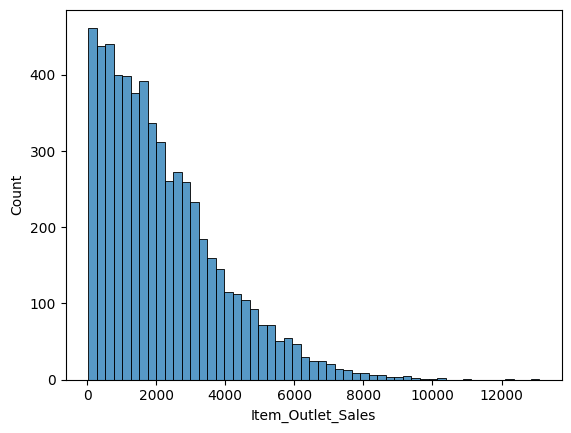

In [93]:
sns.histplot(y_train);

In [94]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np



In [95]:
def train_and_eval_model(model,X_train,y_train,cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'))
    print('Model:', model)
    # R2 values
    r2_scores = cv_results['test_r2']
    print('R2 CV scores:', r2_scores)
    print('R2 CV scores mean / stdev:', np.mean(r2_scores), '/', np.std(r2_scores))

    #RSME
    rsme_scores = cv_results['test_neg_root_mean_squared_error']
    rsme_scores = [-1*score for score in rsme_scores]
    print('RSME CV scores:', rsme_scores)
    print('RSME CV scores mean / stdev:', np.mean(rsme_scores), '/', np.std(rsme_scores))

In [96]:
rf = RandomForestRegressor(random_state = SEED)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV scores mean / stdev: 0.5429242875459817 / 0.01828158855152387
RSME CV scores: [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]
RSME CV scores mean / stdev: 1161.9339951352256 / 32.888811410647826


In [97]:


gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)


Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 CV scores mean / stdev: 0.5866459646024772 / 0.022148578096336337
RSME CV scores: [1056.8793046591481, 1082.786581771003, 1140.2068860094903, 1080.838373141466, 1163.8349579736446]
RSME CV scores mean / stdev: 1104.9092207109504 / 40.23395923794627


In [98]:
hgb = HistGradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RSME CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RSME CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [99]:
xgr = xgb.XGBRegressor(objective ='reg:squarederror', random_state = SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV scores mean / stdev: 0.5577825481764618 / 0.021778582707669483
RSME CV scores: [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.893076803

In [100]:
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

#Handling Categorical Data
expt 2: All categorical columns - Native Handling without item identifier with models other than xgboost.

In [101]:
X_train_copy = X_train.copy().drop(columns = ['Item_Identifier'])

cat_cols = X_train_copy.select_dtypes(include = ['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes(exclude = ['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [102]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy[cat_cols+num_cols]

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [103]:
categorical_mask = [True]*n_categorical_features + [False]*n_numerical_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [104]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector


#take category col --> to make them to num
ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan),
        make_column_selector(dtype_include = 'category'),
    ),
    remainder = 'passthrough',
    verbose_feature_names_out = False
)

hgb = make_pipeline(ordinal_encoder, HistGradientBoostingRegressor(random_state = 42, categorical_features = categorical_mask),
)
train_and_eval_model(model=hgb, X_train=X_train_copy, y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78919547ab60>)],
                                   verbose_feature_names_out=False)),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                 

In [105]:
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

# Handling Categorical Data
expt 3: NO Item Identifier - one hot encoded

In [106]:
cat_feats = X_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_features_names = ohe.get_feature_names_out(cat_feats.columns)
ohe_features_names

array(['Item_Fat_Content_Low_Fat', 'Item_Fat_Content_Non_Edible',
       'Item_Fat_Content_Regular', 'Item_Type_Drink', 'Item_Type_Food',
       'Item_Type_Non-consmables', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [107]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_train = X_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_features_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non-consmables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [108]:
X_train_final.shape

(5966, 30)

In [109]:
gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV scores mean / stdev: 0.5891824563495011 / 0.01880337124010431
RSME CV scores: [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RSME CV scores mean / stdev: 1101.5034553447979 / 33.864902948875674


In [110]:
hgb = HistGradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RSME CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RSME CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [111]:
xgr = xgb.XGBRegressor(objective ='reg:squarederror', random_state = SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52348154 0.47860959 0.45772502 0.49196841 0.46576096]
R2 CV scores mean / stdev: 0.48350910211416415 / 0.023122182697374725
RSME CV scores: [1163.075778281383, 1226.547983760074, 1285.7789125594438, 1232.403674476319, 1268.41713837

In [112]:
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

# Handling Categorical Data
Expt 4: Item Identifier - feature hashed, rest categorical - one hot encoded

In [113]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size = 50
fh = FeatureHasher(n_features = hash_vector_size, input_type = 'string')
# Convert each string in the Series to a list with a single element
hashed_df = pd.DataFrame(fh.transform(X_train['Item_Identifier'].apply(lambda x: [x])).toarray(),
                         columns = ['H'+str(i) for i in range(hash_vector_size)])
hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
cat_feats = X_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_features_names = ohe.get_feature_names_out(cat_feats.columns)


In [115]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_train = X_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_features_names)
X_train_final = pd.concat([num_feats_train,hashed_df, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [116]:
gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60324351 0.58551631 0.57101679 0.61681415 0.54613805]
R2 CV scores mean / stdev: 0.5845457617560487 / 0.024698108181039926
RSME CV scores: [1061.2804537177167, 1093.5955805535832, 1143.6066269002074, 1070.3168274550164, 1169.1121612583172]
RSME CV scores mean / stdev: 1107.5823299769681 / 41.980663856347405


In [117]:
xgr = xgb.XGBRegressor(objective ='reg:squarederror', random_state = SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.53676464 0.48594853 0.47719171 0.53119059 0.4537317 ]
R2 CV scores mean / stdev: 0.496965433032841 / 0.03205266365570525
RSME CV scores: [1146.7506604419434, 1217.8851239011724, 1262.4894157229014, 1183.8748256970878, 1282.61788146

In [118]:
hashed_test_df = pd.DataFrame(fh.transform(X_test['Item_Identifier'].apply(lambda x: [x])).toarray(),
                         columns = ['H'+str(i) for i in range(hash_vector_size)])
num_feats_test = X_test.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_test = X_test.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns = ohe_features_names)
X_test_final = pd.concat([num_feats_test,hashed_test_df, X_test_cat_ohe], axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [119]:
xgr = xgb.XGBRegressor(objective ='reg:squarederror', random_state = SEED)
xgr.fit(X_train_final, y_train)
y_pred = xgr.predict(X_test_final)

In [120]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared = False))

R2 score: 0.542336999238969
RMSE: 1132.2151309907754


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

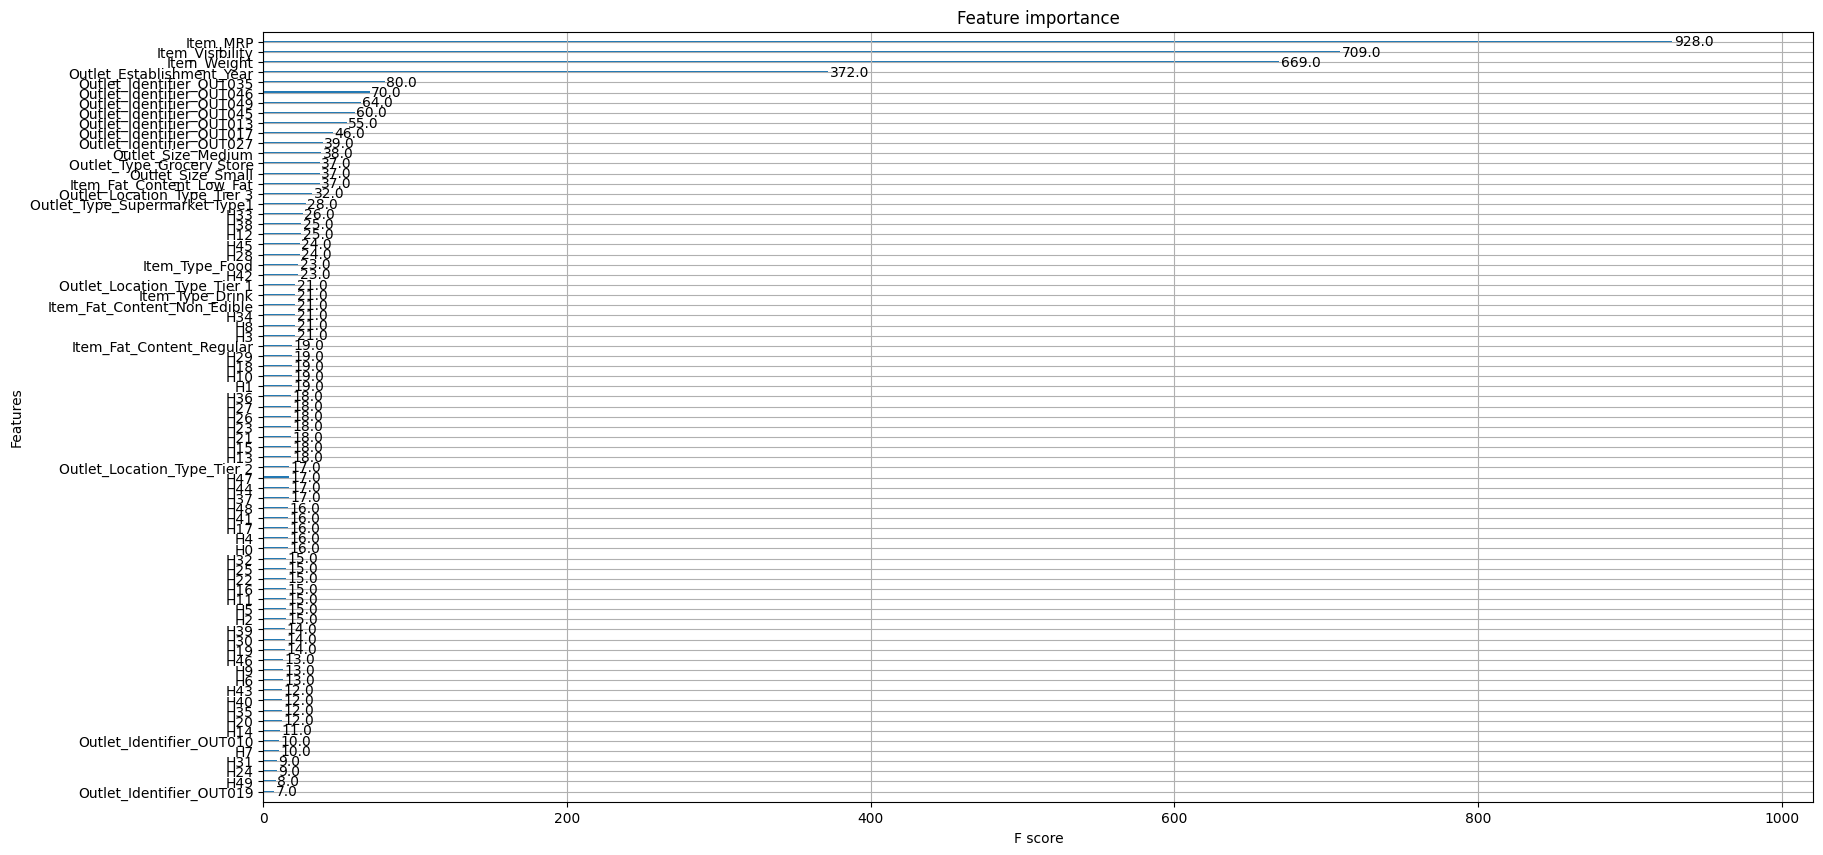

In [121]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize=(20,10))
plot_importance(xgr, ax=ax)
